In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Titanic Dataset Project/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
missing_percerntage = ((df.isnull().sum()/len(df))*100).round(0)
print(missing_percerntage)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64


Since "Age" feature is important and has fewer missing values, I will impute missing values using KNN imputer

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Age'] = pd.DataFrame(imputer.fit_transform(df[['Age']]),columns=['Age_imputed'])

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


Now, we will drop the column 'Cabin' as it has more than 70%(exact 77%) missing values

In [10]:
df.drop(columns = ['Cabin'], inplace = True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


'Embarked' column still has missing values, so I will impute it with Mode value.

In [12]:
# Cheking the numbers of missing values
df['Embarked'].isnull().sum()

#Imputing it with Mode.
most_frequent_embarked = df['Embarked'].mode().iloc[0]
df['Embarked'].fillna(most_frequent_embarked, inplace = True)

df.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Since there are no missing values, we will encode the categorical values. I will use one hot encoder and not Label Encoder, since the verctors such as 'Sex' and 'Embarked' are not ordinal.

In [14]:
categorical_features = ['Sex', 'Embarked']

df_encoded = pd.get_dummies(df, columns = categorical_features, drop_first = True)

df = df_encoded
df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [15]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [16]:
df['Titles'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df['Titles'].nunique()


17

There are total 17 unique tiles and encoding will create so many new vectors and it will lead to 'curse of dimentiality'. So, I belive I should group them in 4 broader categories.

In [17]:
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master'}

df['Titles'] = df['Titles'].map(title_mapping).fillna('Other')

print(df[['Name', 'Titles']].tail(20))

                                                 Name Titles
871  Beckwith, Mrs. Richard Leonard (Sallie Monypeny)    Mrs
872                          Carlsson, Mr. Frans Olof     Mr
873                       Vander Cruyssen, Mr. Victor     Mr
874             Abelson, Mrs. Samuel (Hannah Wizosky)    Mrs
875                  Najib, Miss. Adele Kiamie "Jane"   Miss
876                     Gustafsson, Mr. Alfred Ossian     Mr
877                              Petroff, Mr. Nedelio     Mr
878                                Laleff, Mr. Kristo     Mr
879     Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)    Mrs
880      Shelley, Mrs. William (Imanita Parrish Hall)    Mrs
881                                Markun, Mr. Johann     Mr
882                      Dahlberg, Miss. Gerda Ulrika   Miss
883                     Banfield, Mr. Frederick James     Mr
884                            Sutehall, Mr. Henry Jr     Mr
885              Rice, Mrs. William (Margaret Norton)    Mrs
886                     

In [18]:
df_encode = pd.get_dummies(df, columns = ['Titles'], drop_first = True )


In [19]:
df = df_encode

In [20]:
df.drop(columns = ['Name', 'Ticket'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Other
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1,0,0


In [21]:
df.shape[1]

14

Since number of columns are higher. I will try some feature engineering tasks to reduce dimentiones.

In [22]:
# Column of SibSp(Siblings/spouse aboard) and Parch(number of parents/children aboarad) can be merged.
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Other,FamilySize
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1,0,0,0


In [23]:
df.drop(columns = ['SibSp', 'Parch'], inplace = True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Other,FamilySize
0,1,0,3,22.0,7.2500,1,0,1,0,1,0,0,1
1,2,1,1,38.0,71.2833,0,0,0,0,0,1,0,1
2,3,1,3,26.0,7.9250,0,0,1,1,0,0,0,0
3,4,1,1,35.0,53.1000,0,0,1,0,0,1,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1,0,0,0


In [25]:
#Binning the 'Age' column
age_bins = [0, 12, 18, 30, 50, float('inf')]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

#Binning the 'Fare' column
fare_bins = [0, 10, 30, 60, 100, float('inf')]
fare_labels = ['Low', 'Moderate', 'High', 'Very High', 'Ultra High']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

#Display the first few rows of the DataFrame with the new binned features
print(df[['Age', 'AgeGroup', 'Fare', 'FareGroup']].head())


    Age     AgeGroup     Fare  FareGroup
0  22.0  Young Adult   7.2500        Low
1  38.0        Adult  71.2833  Very High
2  26.0  Young Adult   7.9250        Low
3  35.0        Adult  53.1000       High
4  35.0        Adult   8.0500        Low


In [26]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Other,FamilySize,AgeGroup,FareGroup
0,1,0,3,22.0,7.2500,1,0,1,0,1,0,0,1,Young Adult,Low
1,2,1,1,38.0,71.2833,0,0,0,0,0,1,0,1,Adult,Very High
2,3,1,3,26.0,7.9250,0,0,1,1,0,0,0,0,Young Adult,Low
3,4,1,1,35.0,53.1000,0,0,1,0,0,1,0,1,Adult,High
4,5,0,3,35.0,8.0500,1,0,1,0,1,0,0,0,Adult,Low


In [27]:
df.drop(columns = ['PassengerId', 'Age', 'Fare'], inplace = True)
df.head()

,Survived,Pclass,Sex_male,Embarked_Q,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Other,FamilySize,AgeGroup,FareGroup
0,0,3,1,0,1,0,1,0,0,1,Young Adult,Low
1,1,1,0,0,0,0,0,1,0,1,Adult,Very High
2,1,3,0,0,1,1,0,0,0,0,Young Adult,Low
3,1,1,0,0,1,0,0,1,0,1,Adult,High
4,0,3,1,0,1,0,1,0,0,0,Adult,Low


In [28]:
label_encoder = LabelEncoder()
df['AgeGroup'] = label_encoder.fit_transform(df['AgeGroup'])
df['FareGroup'] = label_encoder.fit_transform(df['FareGroup'])

In [29]:
df.head()

,Survived,Pclass,Sex_male,Embarked_Q,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Other,FamilySize,AgeGroup,FareGroup
0,0,3,1,0,1,0,1,0,0,1,4,1
1,1,1,0,0,0,0,0,1,0,1,0,4
2,1,3,0,0,1,1,0,0,0,0,4,1
3,1,1,0,0,1,0,0,1,0,1,0,0
4,0,3,1,0,1,0,1,0,0,0,0,1


In [30]:
df_without_survived = df.copy()
df_without_survived.shape[1]
df_without_survived.drop( columns = 'Survived', inplace = True)


In [31]:
df_without_survived.head()

,Pclass,Sex_male,Embarked_Q,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Other,FamilySize,AgeGroup,FareGroup
0,3,1,0,1,0,1,0,0,1,4,1
1,1,0,0,0,0,0,1,0,1,0,4
2,3,0,0,1,1,0,0,0,0,4,1
3,1,0,0,1,0,0,1,0,1,0,0
4,3,1,0,1,0,1,0,0,0,0,1


In [32]:
df.head()

,Survived,Pclass,Sex_male,Embarked_Q,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Other,FamilySize,AgeGroup,FareGroup
0,0,3,1,0,1,0,1,0,0,1,4,1
1,1,1,0,0,0,0,0,1,0,1,0,4
2,1,3,0,0,1,1,0,0,0,0,4,1
3,1,1,0,0,1,0,0,1,0,1,0,0
4,0,3,1,0,1,0,1,0,0,0,0,1


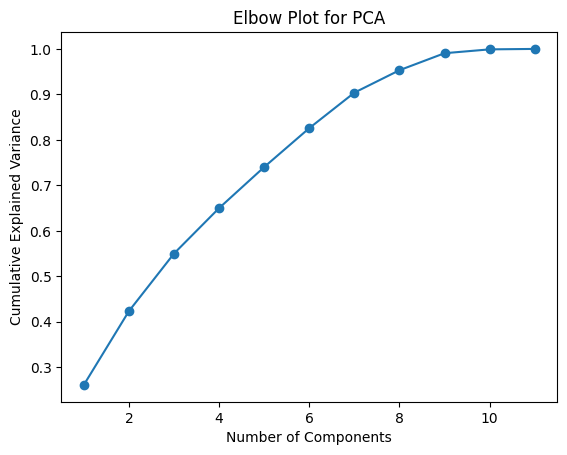

In [33]:
from sklearn.decomposition import PCA
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_without_survived)

# Perform PCA

pca = PCA()
explained_variance_ratio = pca.fit(X_scaled).explained_variance_ratio_

# Create an elbow plot
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.show()

In [34]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_without_survived)

# Perform PCA with 10 components
num_components = 10
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.607194  0.214780 -0.892677 -0.008297  0.080651 -0.296864  0.682168   
1  3.032189 -1.772475  1.864441  2.114387 -0.905239  0.147909 -0.532613   
2  1.481569  1.252947 -1.353893 -1.493134  0.197632 -1.375839 -0.135238   
3  1.912575 -1.869880 -0.509800  1.339621  1.442042 -0.559524 -1.735662   
4 -1.550532 -0.510744 -0.521391 -0.210106  0.318691  0.575069 -1.171369   

        PC8       PC9      PC10  
0  0.003647  0.011403 -0.091908  
1 -0.262110  0.767664  0.006906  
2 -0.242703  0.225755  0.097873  
3  1.120041 -0.899687 -0.042552  
4 -0.663439  0.330537 -0.094647  


In [35]:
df_pca.shape[0]

891

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your PCA-transformed data 'df_pca' and target 'y'

X = df_pca  # Use your PCA-transformed data
y = df['Survived']  # Use your target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       105
           1       0.73      0.80      0.76        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



# Now I will try with Random Forest Algorithm

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8324022346368715
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



Now, XGBooster algorithm

In [38]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Results are marginally different. Hence, before I move further, I would like to try two more algorithms which are Support Vector Machine and Gradient Boosting algorithm.

Support Vector Machines (SVM)

In [39]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)

SVM Accuracy: 0.8156424581005587
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Predict on test set
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Classification Report:\n", report_gb)

Gradient Boosting Accuracy: 0.8268156424581006
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



So far, Random Forest performed slightly better than other models so I will continue with it.

Now I will proceed with hyper parameter using Grid Search CV for this model.

In [41]:
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'n_estimators': 300}
Best Accuracy: 0.8125980792166217


In [42]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Split data into features (X) and target (y)
X = df_pca
y = df['Survived']

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Initialize the VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('gb', gb_classifier), ('xgb', xgb_classifier)],
    voting='soft'  # You can also try 'hard' voting
)

# Evaluate the ensemble classifier using cross-validation
scores = cross_val_score(ensemble_classifier, X, y, cv=5, scoring='accuracy')
print("Ensemble Classifier Scores:", scores)
print("Average Accuracy:", scores.mean())

Ensemble Classifier Scores: [0.7877095  0.80337079 0.83146067 0.76966292 0.84269663]
Average Accuracy: 0.8069801016885318


Original Random Forest Model:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       549
           1       0.88      0.82      0.85       342

    accuracy                           0.89       891
   macro avg       0.89      0.88      0.88       891
weighted avg       0.89      0.89      0.89       891

Ensemble Model:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       549
           1       0.89      0.81      0.85       342

    accuracy                           0.89       891
   macro avg       0.89      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891



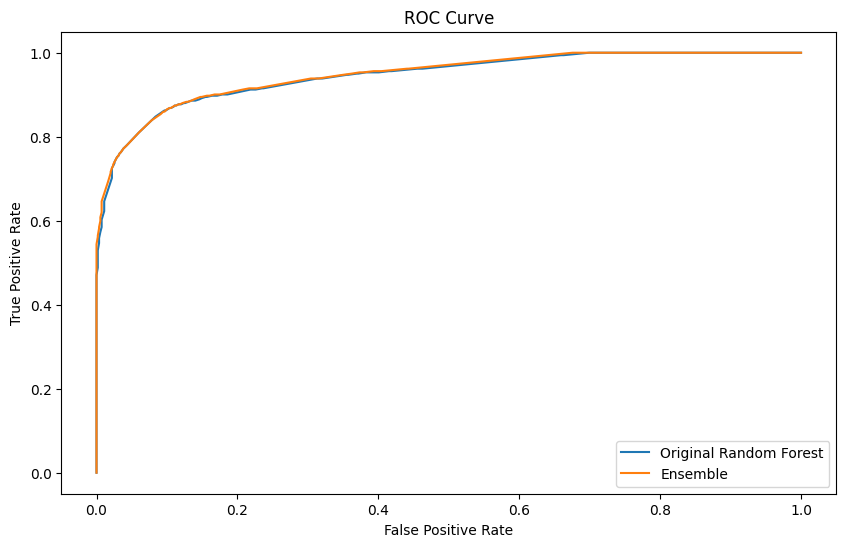

In [43]:
from sklearn.metrics import classification_report, roc_curve, auc

original_rf = RandomForestClassifier(n_estimators=100, random_state=42)
original_rf_scores = cross_val_score(original_rf, X, y, cv=5, scoring='accuracy')

# Initialize the ensemble classifier
ensemble_classifier = VotingClassifier(
    estimators=[('rf', original_rf), ('gb', gb_classifier), ('xgb', xgb_classifier)],
    voting='soft'
)
ensemble_scores = cross_val_score(ensemble_classifier, X, y, cv=5, scoring='accuracy')

# Train the models and get predictions
original_rf.fit(X, y)
ensemble_classifier.fit(X, y)
y_pred_original_rf = original_rf.predict(X)
y_pred_ensemble = ensemble_classifier.predict(X)

# Print classification reports
print("Original Random Forest Model:")
print(classification_report(y, y_pred_original_rf))

print("Ensemble Model:")
print(classification_report(y, y_pred_ensemble))

# Plot ROC curves
fpr_original_rf, tpr_original_rf, _ = roc_curve(y, original_rf.predict_proba(X)[:, 1])
fpr_ensemble, tpr_ensemble, _ = roc_curve(y, ensemble_classifier.predict_proba(X)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_original_rf, tpr_original_rf, label="Original Random Forest")
plt.plot(fpr_ensemble, tpr_ensemble, label="Ensemble")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

As can be seen that original Random Forest performed better above all, Lets set the n_estimators to 300 as per the suggestion of Grid Search CV.

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8379888268156425
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



Model is performing at an accuracy of 84% which is quite good.

This was my first project ever and I hope to explore this dataset further with more understanding as I will learn more. Thanks!